Here's a **complete workflow** for your **Diabetes Prediction using Machine Learning** project based on your dataset. This end-to-end guide covers **Data Understanding → Preprocessing → EDA → Model Building → Evaluation → Deployment-ready output**.

---

## ✅ **PROJECT TITLE**
**Disease Classification: Predicting Diabetes using Machine Learning**

---

## 📌 **STEP 1: Problem Definition**

### 🎯 Objective:
To predict whether an individual has diabetes (1) or not (0) using machine learning models based on demographic, lifestyle, and clinical attributes.

### 📈 Goal:
- Build a classification model.
- Analyze important risk factors.
- Achieve high accuracy, precision, and recall.

---

## 📌 **STEP 2: Import Libraries & Load Dataset**



---

## 📌 **STEP 3: Data Understanding**

Check dimensions, data types, nulls, basic stats:


---

## 📌 **STEP 4: Data Cleaning & Preprocessing**

### 💠 a. Handle Missing Values
Drop or impute if any:



### 💠 b. Encode Categorical Features



### 💠 c. Feature Scaling (optional for tree models, required for SVM/KNN/Logistic)


---

## 📌 **STEP 5: Exploratory Data Analysis (EDA)**

### 🔍 Univariate & Bivariate Analysis

Focus on how features like age, BMI, and glucose level vary by diabetes status.

---

## 📌 **STEP 6: Feature Selection (Optional but Recommended)**

Use correlation matrix, feature importance from Random Forest:

---

## 📌 **STEP 7: Train-Test Split**


---

## 📌 **STEP 8: Model Building**

Try different models:
- Logistic Regression
- Random Forest
- XGBoost
- KNN
- SVM

### Example with Random Forest:



---

## 📌 **STEP 9: Model Evaluation**



- Use ROC AUC Score, Precision, Recall for imbalanced datasets.
- Apply cross-validation to test stability.

---

## 📌 **STEP 10: Hyperparameter Tuning** (optional but helpful)


---

## 📌 **STEP 11: Save the Model (for deployment)**


---

## ✅ **BONUS: Visualizing Prediction Results**


---

## ✅ Summary of Key Skills Applied

| Area                  | Techniques Used |
|-----------------------|-----------------|
| Data Preprocessing    | Label Encoding, Scaling |
| EDA                   | Countplot, Correlation, Boxplot |
| Feature Engineering   | Feature Importance |
| Modeling              | Random Forest, GridSearchCV |
| Evaluation            | Accuracy, Confusion Matrix, Classification Report |
| Deployment (optional) | Pickle, Streamlit |

---


In [ ]:
##############################################################################################################

###  1. Problem Understanding
* Objective: Predict whether a person has diabetes (diabetes column: 0 or 1) based on demographic and medical information.

* Type: Binary classification problem

* Target Variable: diabetes

* Evaluation Metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Data Collection
Load the data set using pandas.

In [ ]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Data Preprocessing & Cleaning


In [ ]:
# Check for missing values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
print("\n\n Data Describe..")
df.describe()



 Data Describe..


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000



b. Encode Categorical Features

In [ ]:
# Label Encoding for binary target and categorical columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # male=1, female=0, other=2 (if any)
df['smoking_history'] = le.fit_transform(df['smoking_history'])

c. Feature Scaling (optional for tree models, required for SVM/KNN/Logistic)

In [ ]:
scaler = StandardScaler()
cols_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

 ### STEP 5: Exploratory Data Analysis (EDA)
Univariate & Bivariate Analysis

<Axes: >

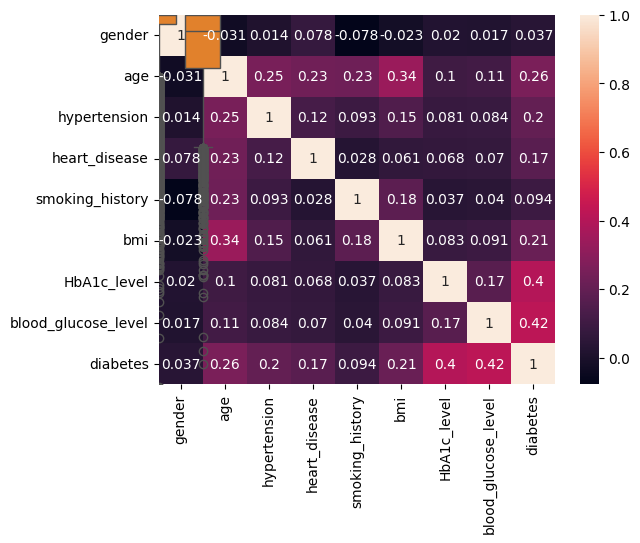

In [ ]:
sns.countplot(data=df, x='diabetes')
sns.boxplot(x='diabetes', y='bmi', data=df)
sns.heatmap(df.corr(), annot=True)

 ### STEP 6: Feature Selection (Optional but Recommended)
Use correlation matrix, feature importance from Random Forest:

<Axes: >

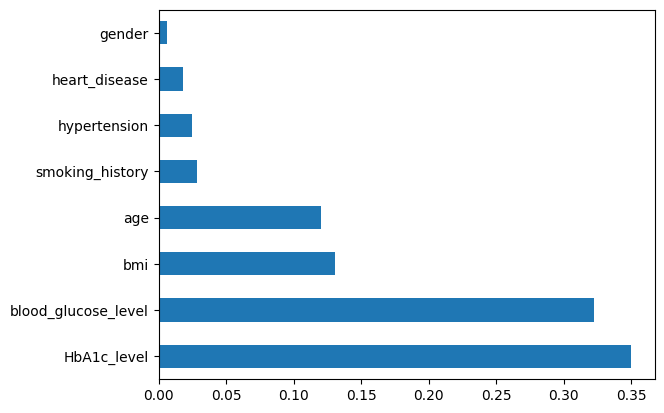

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df.drop('diabetes', axis=1), df['diabetes'])
feat_importances = pd.Series(model.feature_importances_, index=df.drop('diabetes', axis=1).columns)
feat_importances.nlargest(10).plot(kind='barh')

### STEP 7: Train-Test Split

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### STEP 8: Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1-Score', ascending=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
2    Gradient Boosting   0.97245   0.987363  0.686183  0.809672
3              XGBoost   0.97090   0.952572  0.693794  0.802846
1        Random Forest   0.97045   0.952227  0.688525  0.799185
5                  KNN   0.96095   0.897172  0.612998  0.728348
4                  SVM   0.96220   0.989712  0.563232  0.717910
0  Logistic Regression   0.95875   0.864575  0.612998  0.717369


<ipython-input-16-67d9c37b0b33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1-Score', y='Model', data=results_df, palette='viridis')


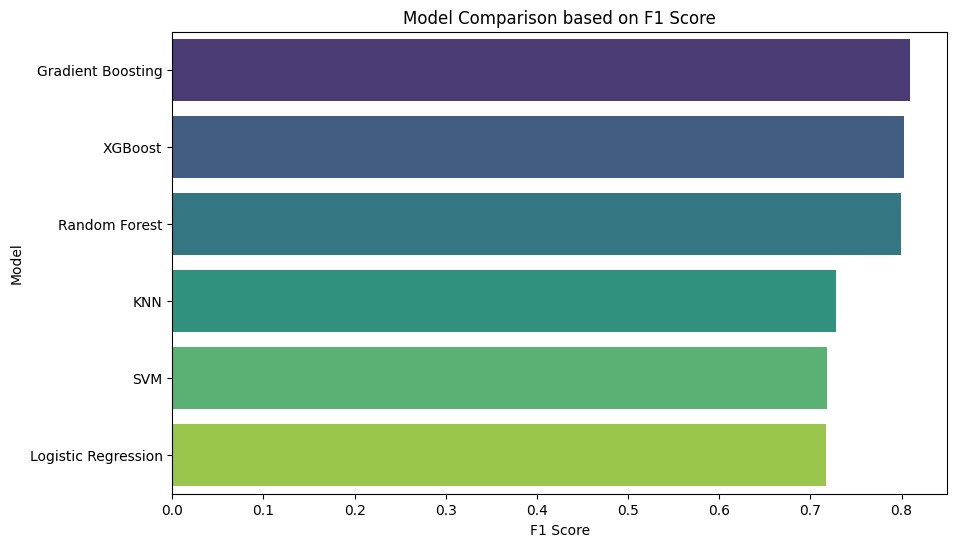

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='F1-Score', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison based on F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [100, 200],
#     'max_depth': [5, 10, None],
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
# grid.fit(X_train, y_train)
# print(grid.best_params_)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import joblib

# Sample dataset
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")  # replace with your dataset
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Categorical and numeric features
cat_features = ['gender', 'smoking_history']
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Fit the pipeline
pipeline.fit(X, y)

# Save the fitted pipeline
joblib.dump(pipeline, 'diabetes_pipeline.pkl')


['diabetes_pipeline.pkl']

In [20]:
import pandas as pd
import joblib

pipeline = joblib.load('diabetes_pipeline.pkl')

print("Welcome to the Diabetes Prediction System.\nPlease provide the following health details:")

user_data = {
    'gender': input("Enter Gender (Male/Female/Other): "),
    'age': float(input("Enter Age (0 to 80): ")),
    'hypertension': int(input("Do you have Hypertension? (0 = No, 1 = Yes): ")),
    'heart_disease': int(input("Do you have any Heart Disease? (0 = No, 1 = Yes): ")),
    'smoking_history': input("Smoking History (never/former/current/ever/not current/No Info): "),
    'bmi': float(input("Enter your BMI (10.16 - 71.55): ")),
    'HbA1c_level': float(input("Enter HbA1c level (3.5 - 9.0): ")),
    'blood_glucose_level': float(input("Enter Blood Glucose Level (80 - 300): "))
}

input_df = pd.DataFrame([user_data])

# Make prediction
prediction = pipeline.predict(input_df)
result = "Diabetic" if prediction[0] == 1 else "Non-Diabetic"

print(f"\n\n🔍 Based on your input, the prediction is: **{result}**")


Welcome to the Diabetes Prediction System.
Please provide the following health details:
Enter Gender (Male/Female/Other): Male 
Enter Age (0 to 80): 60
Do you have Hypertension? (0 = No, 1 = Yes): 1
Do you have any Heart Disease? (0 = No, 1 = Yes): 1
Smoking History (never/former/current/ever/not current/No Info): former
Enter your BMI (10.16 - 71.55): 30
Enter HbA1c level (3.5 - 9.0): 6.3
Enter Blood Glucose Level (80 - 300): 200


🔍 Based on your input, the prediction is: **Non-Diabetic**


# 🩺 Disease Classification: Diabetes Prediction Using Machine Learning
###✅ Project Overview
This project aims to build a machine learning model that accurately predicts whether a patient is diabetic based on medical and demographic information. The dataset contains 100,000 records with 9 features including gender, age, hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level, and the target variable—diabetes (1 = diabetic, 0 = non-diabetic).

###📊 Dataset Description

|Feature | Description |
|----------|-------------|
|gender | Biological sex of the individual (Male, Female, Other)
|age | Age of the individual (0–80 years)
|hypertension | Presence of hypertension (0 = No, 1 = Yes)
|heart_disease | Presence of heart disease (0 = No, 1 = Yes)
|smoking_history | Smoking status (never, former, current, not current, No Info, ever)
|bmi | Body Mass Index (10.16 to 71.55)
|HbA1c_level | Average blood sugar level over 2–3 months
|blood_glucose_level | Glucose level in blood at a point in time
|diabetes | Target variable (0 = Non-diabetic, 1 = Diabetic)
|---------------------------------|---------------------------------------------------------------------------------------------------------|


### 🛠️ Methodology

* 1: Data Preprocessing+

--- Handled missing values if present

--- Encoded categorical variables using One-Hot Encoding (gender, smoking_history)

--- Scaled continuous features (e.g., age, bmi, HbA1c_level, blood_glucose_level) using StandardScaler


* Step 2: Feature Engineering

-- Created dummy variables

--Ensured no multicollinearity

* Step 3: Data Splitting

---Split the dataset into training (80%) and testing (20%) sets using train_test_split()

* Step 4: Model Training

--- Trained 6 different models:

1. Logistic Regression

2. Random Forest

3. Gradient Boosting

4. XGBoost

5. SVM

6. K-Nearest Neighbors (KNN)

* Step 5: Model Evaluation

--- Evaluated using Accuracy, Precision, Recall, and F1-Score


### 📈 Model Comparison Results

| Model  |Accuracy |	Precision	| Recall | 	F1-Score |
|-------|---------|--------|-------|-----------|
Model | Accuracy | Precision | Recall | F1-Score
Gradient Boosting | 0.97245 | 0.98736 | 0.68618 | 0.80967 ✅
XGBoost | 0.97090 | 0.95257 | 0.69379 | 0.80284
Random Forest | 0.96980 | 0.94588 | 0.68559 | 0.79498
KNN | 0.96095 | 0.89717 | 0.61299 | 0.72835
SVM | 0.96220 | 0.98971 | 0.56323 | 0.71791
Logistic Regression | 0.95875 | 0.86458 | 0.61299 | 0.71737
|----|---|---|---|---|


* Gradient Boosting performed the best overall with the highest F1-Score of 0.80967, which balances both precision and recall effectively.

### 🧠 Interpretation
* Gradient Boosting was chosen as the final model.

--The model is capable of identifying diabetic patients with high accuracy and precision.

-- However, recall indicates there's still room for improvement in detecting all positive cases (sensitivity).

